# Задача 2
##### Выполнила: Гребенькова Ольга Сергеевна 774

## Цель
Целью проекта является прогноз временного ряда на несколько отсчетов методом экспоненциального сглаживания. Для достижения наилучшего качества прогноза используется выбор параметра модели.

## Постановка задачи
Решается задача прогнозирования временного ряда. Пусть задано пространство объектов $X$ и задан временной ряд $\{x_{t}\}_{t = 1} ^{L}\ x_{i} \in X$, причем известными считаются первые $N$ отсчетов. Требуется построить алгоритм $a:\{1, \ldots, N + D\}\rightarrow X$, аппроксимирующий зависимость $x_{i},~i = \{1, \ldots, N + D\}$. Параметр $D$ называется горизонтом прогнозирования.

## Описание метода

Рядом экспоненциальных средних, построенным по временному ряду $\{x_{t}\}_{t = 0}^{T}$, называется ряд $\{S_{t}\}$, построенный индуктивно:
$$S_{t} = \alpha x_{t} + (1 - \alpha)S_{t - 1}, \quad t > 1.$$
В определении ряда $S_0$ --- выбранное начальное значение. Величина $\alpha\in (0,1)$ называется параметром сглаживания.  


Значение $S_{t - 1}$ будем использовать как прогноз для $x_{t}$.
Замкнутая форма для $S_{t}$ получается преобразованием суммы:

$$S_{t} = 
\alpha \sum\limits_{i = 0}^{N}(1 - \alpha)^{i} x_{t - i} + (1 - \alpha)^{N}S_{0},$$
 где $N$ --- число членов ряда. 
Таким образом, $S_{t}$ --- взвешенная сумма членов ряда. Заметим, что чем <<старше>> член ряда, тем меньше его вес.
 
В задачах краткосрочного прогнозирования для повышения значимости <<свежих>> наблюдений параметр сглаживания следует увеличивать. Однако для сглаживания выбросов $\alpha$ нужно уменьшать. Таким образом, задача сводится к поиску компромиссного значения параметра.

## Выбор значения $S_0$

Значение $S_{0}$ должно задаваться с учетом априорной информации. Часто используется среднее значение ряда или среднее значение наблюдений в предыстории, если она доступна. Также в качестве $S_{0}$ может быть положено значение $x_{1}$.

В данной работе в качестве $S_{0}$ используется первое значение наблюдаемого ряда.

Рассчитаем, сколько последних членов ряда вносят существенный вклад в прогноз. 
Пусть $x_{T}$ - текущее наблюдение. Назовём возрастом наблюдения $x_t$ относительно наблюдения $x_{T}$ число $T-t$. 
В частности, возраст текущего наблюдения равен $0$, предыдущего --- $1$.

Средним возрастом членов ряда называется взвешенная сумма возрастов с коэффициентами $\{\alpha(1 - \alpha)^{i}\}_{i = 0}^{\infty}$.

Средний возраст сходится при длине ряда, стремящейся к бесконечности, к величине 
    $$0 \cdot \alpha + 1 \cdot \alpha(1 - \alpha) + 2 \cdot \alpha(1 - \alpha)^{2}\ldots = \cfrac{1 - \alpha}{\alpha}.$$
Значит, малые значения $\alpha$ увеличивают средний возраст информации.


## Проблемы
Модель работает только при небольшом горизонте прогнозирования. Не учитываются тренд и сезонные изменения. Чтобы учесть их влияние, предлагается использовать модели: Хольта (учитывается линейный тренд) Хольта-Уинтерса (мультипликативные экспоненциальный тренд и сезонность), Тейла-Вейджа (аддетивные линейный тренд и сезонность).

### TurkElectricityConsumption_Readme

The fields are:

Date, Matlab format
Hour (data averaged inbetween this hour and the next one)
Decided Daily Production Program (MWh)	
Projected Remaining Load Amount to Balancing Units (MWh)	
Get load Amount for Prior Day Supply Demand Balance (MWh)	
Load Shedding Amount for Prior Day Supply Demand Balance (MWh)	
"System Marginal Price
(SMF (TL))"


In [13]:
data = [17258,
16967,
18502,
18718,
18825,
18749,
18654,
18790,
19144,
19137,
19145,
19022,
19053,
19081,
19071,
18866,
18597,
18617,
18615,
18617,
18614,
18618,
18326,
18219,
18427,
18352,
18655,
19049,
19049,
19091,
19049,
19287,
19134,
19126,
19136,
19124,
19156,
19183,
19045,
18868,
18780,
18823,
18821,
18823,
18821,
18821,
18530,
18425,
18628,
18797,
19777,
20165,
20315,
20346,
20285,
20111,
19393,
19256,
19249,
19236,
19235,
19278,
19290,
19132,
18893,
18863,
18887,
18888,
18888,
18866,
18608,
18471,
19100,
19312,
19195,
19585,
19629,
19664,
19604,
19659,
19338,
18945,
18953,
18677,
18534,
18576,
18566,
18341,
18477,
18507,
18709,
18714,
18715,
18691,
18517,
18730,
18545,
18531,
20242,
20754,
20767,
20608,
20470,
20714,
20841,
20831,
20693,
19805,
19465,
19499,
19549,
20029,
19527,
19441,
19016,
19023,
18934,
17783,
16412,
15689,
18790,
18914,
18926,
19316,
19484,
19398,
19362,
19451,
19440,
19430,
18977,
18789,
18722,
18803,
19001,
18701,
16079,
16412,
16057,
16097,
16092,
15945,
15704,
15679,
18968,
19157,
18942,
19479,
19354,
19233,
19193,
19275,
18942,
18939,
18936,
18733,
18768,
18853,
18750,
18263,
16805,
16780,
16540,
16580,
16584,
16071,
15630,
15604,
]

In [15]:
val= data[:-1]
print(len(data))

168


In [42]:
def exponential_smoothing(x, alpha,leng):
    result = [x[0]] # first value is same as series
    for n in range(1, leng):
        result.append(round(alpha * x[n] + (1 - alpha) * result[n-1]))
    #result.append(round(alpha * x[n][1] + (1 - alpha) * result[n]))
    return result

In [43]:
def double_exponential_smoothing(x, alpha, beta, leng):
    result = [x[0]]
    for n in range(1,leng):#+1):
        if n == 1:
            level, trend = x[0], x[1] - x[0]
        if n >= leng: # прогнозируем
            value = result[-1]
        else:
            value = x[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(round(level+trend))
    return result

In [53]:
a = 0.25
res = exponential_smoothing(val,a, 167)
nres = exponential_smoothing(val,a, 14)
sres = exponential_smoothing(val ,0.71, 100)
print (res)
b = 0.25
res1 = double_exponential_smoothing(val, a, b, 167)
nres1 = double_exponential_smoothing(val,a, b, 14)
sres1 = double_exponential_smoothing(val, a, 0.72, 100)
print (res1)

[17258, 17185, 17514, 17815, 18068, 18238, 18342, 18454, 18626, 18754, 18852, 18894, 18934, 18971, 18996, 18964, 18872, 18808, 18760, 18724, 18696, 18676, 18588, 18496, 18479, 18447, 18499, 18636, 18739, 18827, 18882, 18983, 19021, 19047, 19069, 19083, 19101, 19122, 19103, 19044, 18978, 18939, 18910, 18888, 18871, 18858, 18776, 18688, 18673, 18704, 18972, 19270, 19531, 19735, 19872, 19932, 19797, 19662, 19559, 19478, 19417, 19382, 19359, 19302, 19200, 19116, 19059, 19016, 18984, 18954, 18868, 18769, 18852, 18967, 19024, 19164, 19280, 19376, 19433, 19490, 19452, 19325, 19232, 19093, 18953, 18859, 18786, 18675, 18626, 18596, 18624, 18646, 18663, 18670, 18632, 18656, 18628, 18604, 19014, 19449, 19778, 19986, 20107, 20259, 20404, 20511, 20556, 20368, 20142, 19981, 19873, 19912, 19816, 19722, 19546, 19415, 19295, 18917, 18291, 17640, 17928, 18174, 18362, 18600, 18821, 18965, 19064, 19161, 19231, 19281, 19205, 19101, 19006, 18955, 18966, 18900, 18195, 17749, 17326, 17019, 16787, 16576, 16358

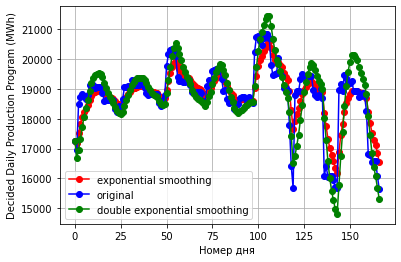

In [51]:
import matplotlib.pyplot as mp
t = []
p = []
mp.plot(range(167), res, 'ro-',label = 'exponential smoothing')
mp.plot(range(167), val, 'bo-', label = 'original')
mp.plot(range(167), res1, 'go-',label = 'double exponential smoothing')
mp.ylabel(r'Decided Daily Production Program (MWh)')
mp.xlabel(r'Номер дня')
mp.legend()
mp.grid(True)
mp.show()

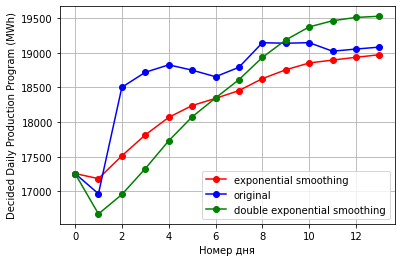

In [52]:
import matplotlib.pyplot as mp
mp.plot(range(14), nres, 'ro-',label = 'exponential smoothing')
mp.plot(range(14), val[:14], 'bo-', label = 'original')
mp.plot(range(14), nres1, 'go-',label = 'double exponential smoothing')
mp.ylabel(r'Decided Daily Production Program (MWh)')
mp.xlabel(r'Номер дня')
mp.legend()
mp.grid(True)
mp.show()

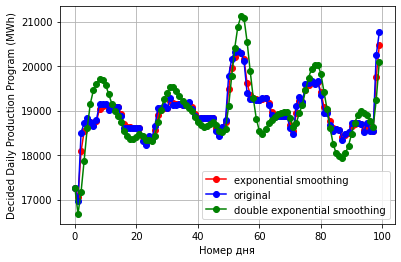

In [54]:
import matplotlib.pyplot as mp
mp.plot(range(100), sres, 'ro-',label = 'exponential smoothing')
mp.plot(range(100), val[:100], 'bo-', label = 'original')
mp.plot(range(100), sres1, 'go-',label = 'double exponential smoothing')
mp.ylabel(r'Decided Daily Production Program (MWh)')
mp.xlabel(r'Номер дня')
mp.legend()
mp.grid(True)
mp.show()